## DataScience_Nanodegree_p1-Seattle_Airbnb

### 1. Business understanding

This dataset contains a list of apartments available on the booking service Airbnb for the city of Seattle along with useful information such as price, neighborhood, etc. We can use this data to answer the following question:
 - Whats the cheapest time of the year to travel to Seattle and how does it match with the booking volume?
 - What are the most expensive / cheapest neighborhoods?
 - What are the most relevant price factors?

### 2. Data understanding

#### 2.1 Importing and loading the data

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [108]:
df_cal=pd.read_csv('calendar.csv')
df_listing=pd.read_csv('listings.csv')

#### 2.2 Get a first glance on the data

In [109]:
print("Shape of listing: ", str(df_listing.shape))
print("Shape of calender: ", str(df_cal.shape))

Shape of listing:  (3818, 92)
Shape of calender:  (1393570, 4)


In [110]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [111]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [112]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

#### 2.3 Further data exploration and preparation

First we check the datatypes of the columns in df_cal

In [113]:
df_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

It seems that we have to clean up the price and convert it to a number:

In [114]:
df_cal['price'] = df_cal['price'].str.replace("$","").str.replace(",","")
df_cal['price'] = df_cal['price'].astype(np.float64)

### 4. Try to answer the asked questions

#### 4.1 Whats the cheapest time of the year to travel to Seattle?

To answer the first question we just have to group the price by each month, average the result and plot it. But befor we can do that we have to convert the date column to a datetime-object and create a 'month' column in the dataframe

In [115]:
df_cal['date'] = pd.to_datetime(df_cal['date'])
df_cal['month'] = pd.DatetimeIndex(df_cal['date']).month

In [116]:
df_cal['month'].value_counts()

12    118358
10    118358
8     118358
7     118358
5     118358
3     118358
11    114540
9     114540
6     114540
4     114540
1     114540
2     110722
Name: month, dtype: int64

In [117]:
mean_price_per_month = df_cal.groupby('month').mean()

In [118]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez']

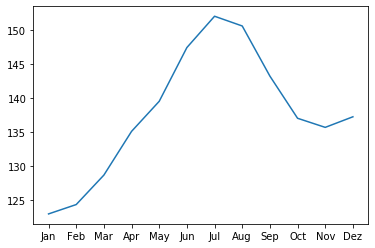

In [119]:
plt.plot(months, mean_price_per_month['price'])

We can clearly see that the most expensive time of the year is in the summer around July. Also there is a little upward trend before christmas. Conversely the cheapest time of the year is in the beginning of the year.

To check the occupancy we go through each month and check the occupancy respectively

In [120]:
d = {'f': False, 't': True}
df_cal.loc[:,'available'] = df_cal.loc[:,'available'].map(d)

In [121]:
occupancies = pd.Series(index=months, dtype=np.float64)
for i, month in enumerate(months):
    occupancies[month] = 1 - df_cal.loc[df_cal['month']==i+1, 'available'].mean() # 1-x, because it's the mean of availability and not occupancy
occupancies

Jan    0.433063
Feb    0.337792
Mar    0.290813
Apr    0.336153
May    0.324330
Jun    0.325616
Jul    0.372903
Aug    0.354949
Sep    0.325598
Oct    0.303486
Nov    0.286014
Dez    0.264427
dtype: float64

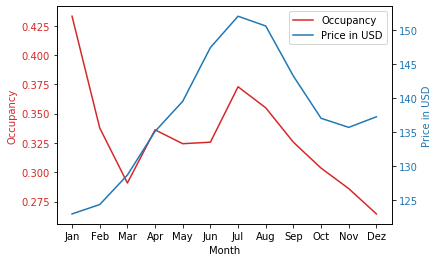

In [122]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Occupancy', color=color)
lns1 = ax1.plot(months, occupancies, color=color, label='Occupancy')
ax1.tick_params(axis='y', labelcolor=color)
line1 = mlines.Line2D([], [], color=color, label='Occupancy')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Price in USD', color=color)  # we already handled the x-label with ax1
ax2.plot(months, mean_price_per_month['price'], color=color, label='Price in USD')
ax2.tick_params(axis='y', labelcolor=color)
line2 = mlines.Line2D([], [], color=color, label='Price in USD')

plt.legend(handles=[line1, line2])
plt.savefig('occupancy.png', dpi=300, bbox_inches='tight')

#### 4.2 Whats the most expensive / cheapest neighbourhood

In order to answer this question we first have to take a look at the different entries in the neighbourhoodcolumn and see if it needs some cleanup.

In [123]:
df_listing['neighbourhood_cleansed'].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

Seems about right. So now we just have to map the neighbourhood to the listing in the df_cal-dataframe and group it by the neighbourhood.

In [124]:
df_listing.rename(columns={'id': 'listing_id'}, inplace=True)

In [125]:
df_cal = df_cal.merge(df_listing[['listing_id','neighbourhood_cleansed']], on='listing_id')

In [126]:
mean_price_per_neighbourhood = df_cal.groupby('neighbourhood_cleansed').mean().sort_values('price', ascending=False)

In [127]:
mean_price_per_neighbourhood.loc['Belltown']

listing_id    5.521046e+06
available     6.242829e-01
price         2.014728e+02
month         6.528767e+00
Name: Belltown, dtype: float64

In [128]:
mean_price_per_neighbourhood.loc[:,'price'].to_frame().head(10)

,price
neighbourhood_cleansed,
Southeast Magnolia,242.077181
Portage Bay,235.960789
Westlake,229.757911
Windermere,220.630903
Briarcliff,216.080733
West Queen Anne,206.809687
Pike-Market,206.110835
Fauntleroy,205.882353
Central Business District,205.790701


In [129]:
mean_price_per_neighbourhood.tail()    

,listing_id,available,price,month
neighbourhood_cleansed,,,,
Victory Heights,4.794101e+06,0.803288,79.955207,6.528767
South Delridge,5.129810e+06,0.715297,76.237153,6.528767
Georgetown,3.712133e+06,0.765753,75.851073,6.528767
Rainier Beach,5.987419e+06,0.729376,75.785893,6.528767
Olympic Hills,5.461578e+06,0.766096,70.560796,6.528767


So the most expensive neighbourhood is Southeast Magnolia and the least expensive one is Olympic Hills. 

#### 4.3 Is the host behaviour affecting the price and availability?

First we have to extract the host-depending columns along with the price. We won't consider non-descriptive columns such as URLs ohr the id, because they don't add information.

So we'll go with these columns:

In [130]:
df_host = df_listing[df_listing['neighbourhood_cleansed']=='Broadway'][['price', 'availability_365', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified']].copy()

In [131]:
df_host.head()

,price,availability_365,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
2575,$50.00,109,NaN,NaN,NaN,f,1.0,1.0,t,f
2576,$59.00,365,within a few hours,100%,100%,f,2.0,2.0,t,t
2577,$122.00,179,within a day,50%,100%,f,1.0,1.0,t,t
2578,$175.00,58,within a few hours,100%,100%,f,1.0,1.0,t,t
2579,$69.00,352,within a few hours,100%,100%,t,1.0,1.0,t,t


Next up we need to convert some of the data to make it accessible

In [132]:
print(df_host.dtypes)

price                         object
availability_365               int64
host_response_time            object
host_response_rate            object
host_acceptance_rate          object
host_is_superhost             object
host_listings_count          float64
host_total_listings_count    float64
host_has_profile_pic          object
host_identity_verified        object
dtype: object


In [133]:
print(df_host['host_response_time'].unique())

[nan 'within a few hours' 'within a day' 'within an hour'
 'a few days or more']


In [134]:
# Price
df_host.loc[:,'price'] = df_host.loc[:,'price'].str.replace("$","").str.replace(",","").astype(np.float64)

# host_response_time (here we rank the possible entries)
d = {'within an hour': 1, 'within a few hours': 2, 'within a day': 3,
       'a few days or more': 4, np.nan: np.nan}
df_host.loc[:,'host_response_time'] = df_host.loc[:,'host_response_time'].map(d)

# host_response_rate and _acceptance_rate
df_host.loc[:,'host_response_rate'] = df_host.loc[:,'host_response_rate'].str.replace("%","").astype(np.float64)
df_host.loc[:,'host_acceptance_rate'] = df_host.loc[:,'host_acceptance_rate'].str.replace("%","").astype(np.float64)

# Boolean convertions (host_is_superhost, host_has_profile_pic, host_identity_verified)
d = {'t': True, 'f': False, np.nan: np.nan}
df_host.loc[:,'host_is_superhost'] = df_host.loc[:,'host_is_superhost'].map(d)
df_host.loc[:,'host_has_profile_pic'] = df_host.loc[:,'host_has_profile_pic'].map(d)
df_host.loc[:,'host_identity_verified'] = df_host.loc[:,'host_identity_verified'].map(d)

Now we check them for NaNs and take car of them

In [135]:
df_host['host_has_profile_pic'].value_counts()

True    397
Name: host_has_profile_pic, dtype: int64

In [243]:
df_host.head()

,price,availability_365,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
2575,50.0,109,NaN,NaN,NaN,False,1.0,1.0,True,False
2576,59.0,365,2.0,100.0,100.0,False,2.0,2.0,True,True
2577,122.0,179,3.0,50.0,100.0,False,1.0,1.0,True,True
2578,175.0,58,2.0,100.0,100.0,False,1.0,1.0,True,True
2579,69.0,352,2.0,100.0,100.0,True,1.0,1.0,True,True


In [244]:
df_host.isnull().mean()

price                        0.000000
availability_365             0.000000
host_response_time           0.166247
host_response_rate           0.166247
host_acceptance_rate         0.204030
host_is_superhost            0.000000
host_listings_count          0.000000
host_total_listings_count    0.000000
host_has_profile_pic         0.000000
host_identity_verified       0.000000
dtype: float64

Overall we don't have to much NaNs and we impute the missing values with the mean of the respective column. Since the boolean columns don't have many missing values, we just drop them, since taking the mean doesn't really make sense in this case.

In [245]:
df_host.dropna(subset=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'], axis=0, inplace=True)

In [246]:
for col in df_host.columns:
    df_host[col] = df_host[col].fillna(df_host[col].mean())

In [247]:
corr = df_host.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Custom\Anaconda\envs\algo\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Custom\Anaconda\envs\algo\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Custom\Anaconda\envs\algo\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,price,availability_365,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
price,1.000000,0.054082,0.115551,0.056323,0.013950,0.108374,0.035574,0.035574,nan,-0.008847
availability_365,0.054082,1.000000,-0.067166,-0.098724,-0.045225,-0.201789,0.127513,0.127513,nan,0.042729
host_response_time,0.115551,-0.067166,1.000000,-0.479328,-0.093071,-0.140716,-0.092067,-0.092067,nan,-0.056169
host_response_rate,0.056323,-0.098724,-0.479328,1.000000,-0.023411,0.093224,0.024147,0.024147,nan,0.098967
host_acceptance_rate,0.013950,-0.045225,-0.093071,-0.023411,1.000000,0.024149,0.014690,0.014690,nan,0.100368
host_is_superhost,0.108374,-0.201789,-0.140716,0.093224,0.024149,1.000000,-0.017627,-0.017627,nan,0.101504
host_listings_count,0.035574,0.127513,-0.092067,0.024147,0.014690,-0.017627,1.000000,1.000000,nan,0.088890
host_total_listings_count,0.035574,0.127513,-0.092067,0.024147,0.014690,-0.017627,1.000000,1.000000,nan,0.088890
host_has_profile_pic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,-0.008847,0.042729,-0.056169,0.098967,0.100368,0.101504,0.088890,0.088890,nan,1.000000


As we can see there is not much correlation between the host-information and the price. The highest correlation is with the response time, but with a value of .12 too low to be considered meaningful. Also, one would suggest that the correlation should be negative, since a lower response_time should be more valuable to the customer. The highest correlation between the occupancy is with the superhost attribute and lies at around 0.2. It's not really high, but it indicates that the superhost-attribute might boost your occupancy.